## Visualizing Beta Distributions in Thompson Sampling: Seperate charts for each arm.

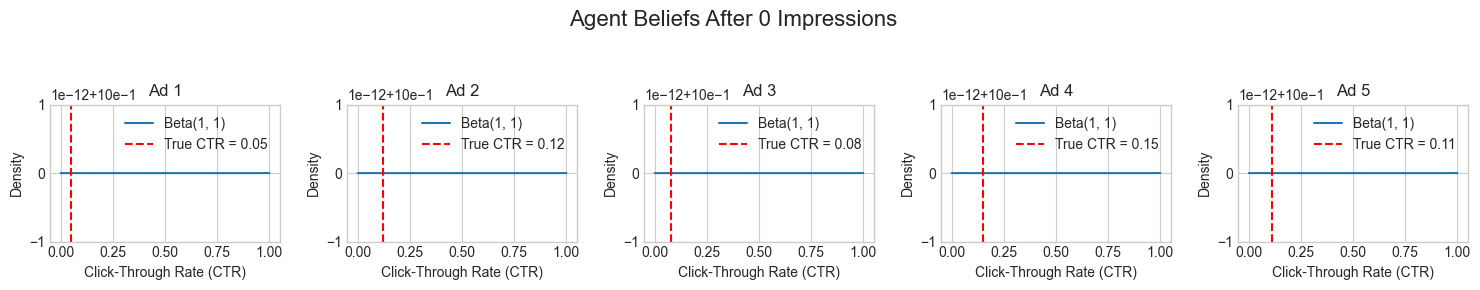

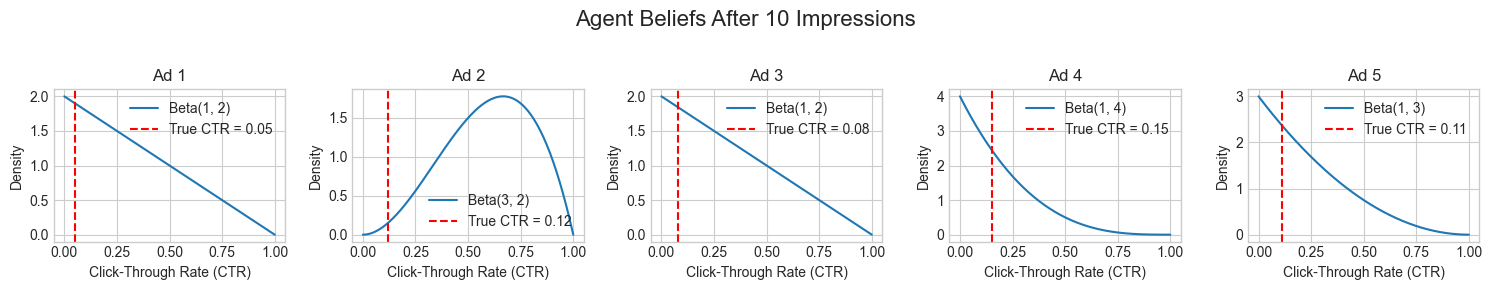

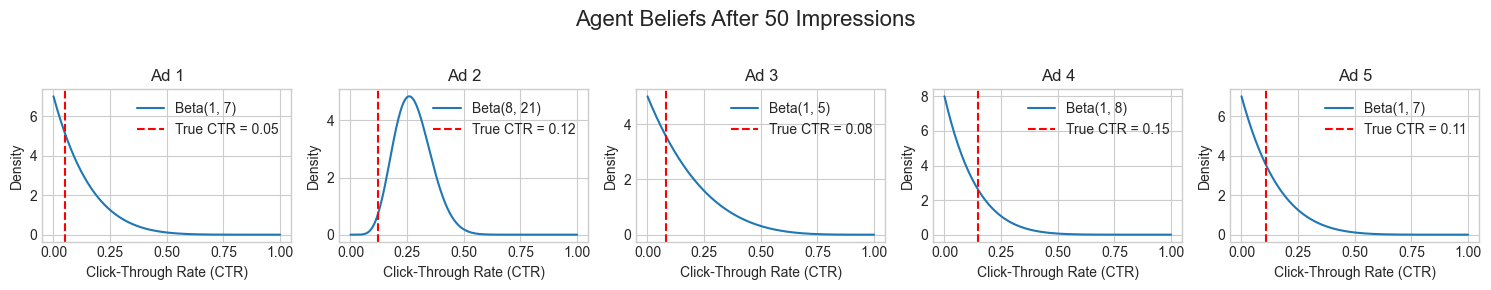

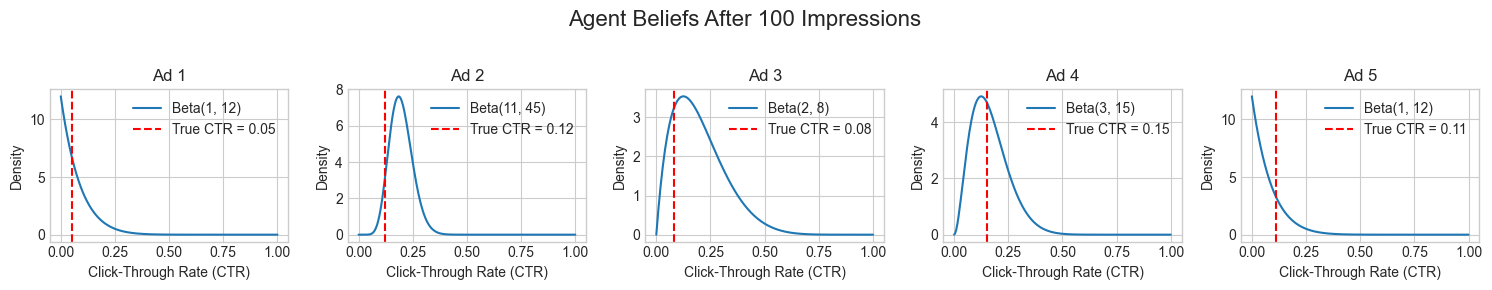

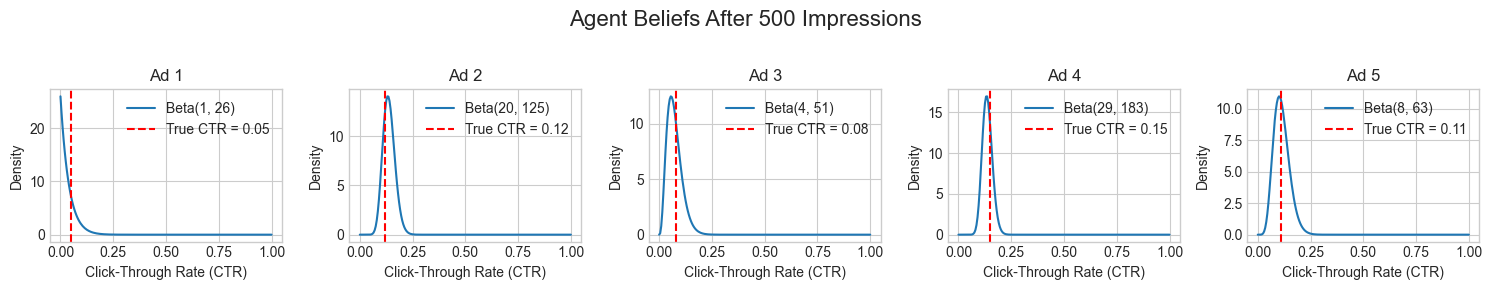

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# =============================================================================
# Step 1: Define the Environment and Agent Classes
# We need these classes to run the simulation. They are simplified versions
# from the main text for this specific visualization task.
# =============================================================================

class AdCampaignEnvironment:
    """
    A simplified simulation of an ad campaign environment.
    """
    def __init__(self, ad_probabilities):
        self.ad_probabilities = ad_probabilities
        self.num_ads = len(ad_probabilities)

    def pull_arm(self, ad_index):
        """
        Simulates showing an ad and returns a reward (1 for click, 0 for no click).
        """
        ctr = self.ad_probabilities[ad_index]
        if np.random.rand() < ctr:
            return 1
        else:
            return 0

class ThompsonSamplingAgent:
    """
    Implements the Thompson Sampling algorithm.
    """
    def __init__(self, num_ads):
        self.num_ads = num_ads
        # Initialize with a uniform prior (alpha=1, beta=1) for each ad.
        # This represents maximum uncertainty initially.
        self.alphas = [1] * num_ads
        self.betas = [1] * num_ads

    def choose_action(self):
        """
        Samples from each ad's Beta distribution and chooses the best one.
        """
        sampled_ctrs = [np.random.beta(self.alphas[i], self.betas[i]) for i in range(self.num_ads)]
        return np.argmax(sampled_ctrs)

    def update(self, chosen_ad_index, reward):
        """
        Updates the alpha or beta parameter for the chosen ad.
        """
        if reward == 1:
            self.alphas[chosen_ad_index] += 1
        else:
            self.betas[chosen_ad_index] += 1

# =============================================================================
# Step 2: Define the Visualization Function
# This function will be called at different points in the simulation.
# =============================================================================

def plot_beta_distributions(agent, true_ctrs, total_impressions):
    """
    Plots the Beta distribution for each ad, representing the agent's beliefs.

    Args:
        agent (ThompsonSamplingAgent): The agent whose beliefs are being plotted.
        true_ctrs (list): The ground truth click-through rates for comparison.
        total_impressions (int): The current step in the simulation, for the title.
    """
    num_ads = agent.num_ads
    # Create a grid of x-values from 0 to 1 for plotting the PDFs.
    x = np.linspace(0, 1, 200)
    
    # Create subplots, one for each ad.
    fig, axs = plt.subplots(1, num_ads, figsize=(15, 3))
    fig.suptitle(f'Agent Beliefs After {total_impressions} Impressions', fontsize=16)

    for i in range(num_ads):
        # Get the current alpha and beta for this ad from the agent
        a = agent.alphas[i]
        b = agent.betas[i]
        
        # Calculate the Probability Density Function (PDF) for the Beta distribution
        pdf = beta.pdf(x, a, b)
        
        # Plot the distribution
        axs[i].plot(x, pdf, label=f'Beta({a}, {b})')
        
        # Plot a vertical line at the true CTR for reference
        axs[i].axvline(x=true_ctrs[i], color='r', linestyle='--', label=f'True CTR = {true_ctrs[i]}')
        
        # Formatting
        axs[i].set_title(f'Ad {i+1}')
        axs[i].set_xlabel('Click-Through Rate (CTR)')
        axs[i].set_ylabel('Density')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# =============================================================================
# Step 3: Run the Simulation and Visualize at Intervals
# =============================================================================

# --- Simulation Parameters ---
true_ctrs = [0.05, 0.12, 0.08, 0.15, 0.11] # Ad #4 (index 3) is best
max_impressions = 501
# Define the specific time steps where we want to see the agent's beliefs
visualization_intervals = [0, 10, 50, 100, 500]

# --- Initialization ---
env = AdCampaignEnvironment(ad_probabilities=true_ctrs)
agent = ThompsonSamplingAgent(num_ads=env.num_ads)

# --- Simulation Loop ---
for i in range(max_impressions):
    # Check if the current step is one of our visualization points
    if i in visualization_intervals:
        plot_beta_distributions(agent, true_ctrs, i)
        
    # Agent chooses an ad, environment gives a reward, agent updates
    chosen_ad = agent.choose_action()
    reward = env.pull_arm(chosen_ad)
    agent.update(chosen_ad, reward)



## Visualizing Beta Distributions in Thompson Sampling: All at once

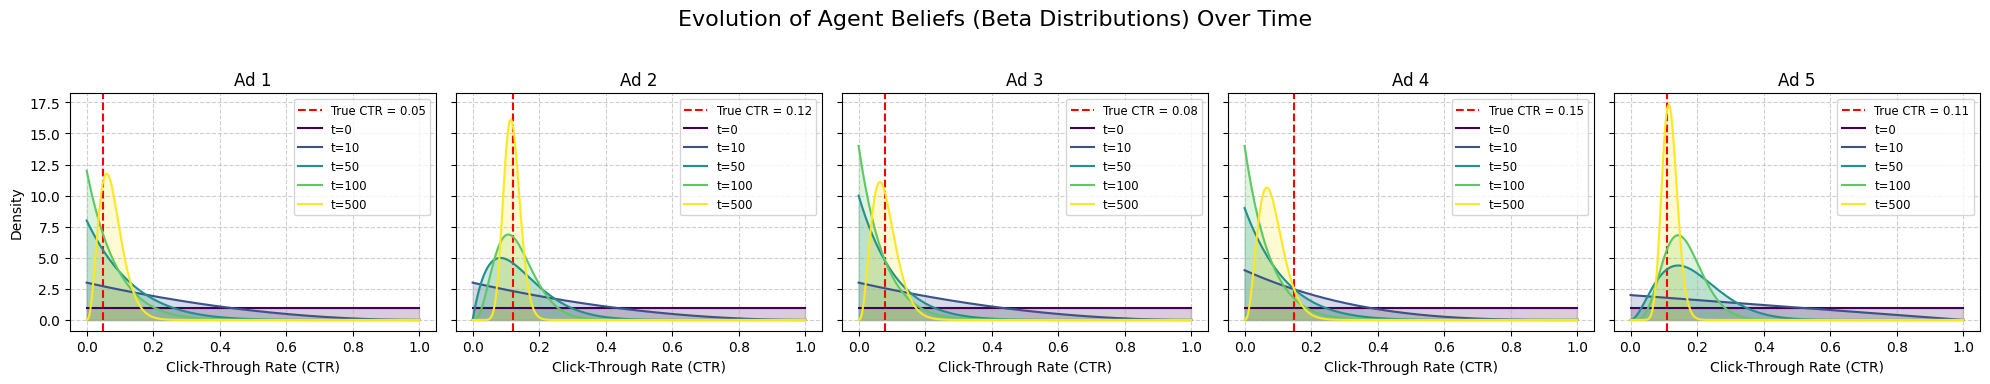

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy

# =============================================================================
# Step 1: Define the Environment and Agent Classes
# We need these classes to run the simulation. They are simplified versions
# from the main text for this specific visualization task.
# =============================================================================

class AdCampaignEnvironment:
    """
    A simplified simulation of an ad campaign environment.
    """
    def __init__(self, ad_probabilities):
        self.ad_probabilities = ad_probabilities
        self.num_ads = len(ad_probabilities)

    def pull_arm(self, ad_index):
        """
        Simulates showing an ad and returns a reward (1 for click, 0 for no click).
        """
        ctr = self.ad_probabilities[ad_index]
        if np.random.rand() < ctr:
            return 1
        else:
            return 0

class ThompsonSamplingAgent:
    """
    Implements the Thompson Sampling algorithm.
    """
    def __init__(self, num_ads):
        self.num_ads = num_ads
        # Initialize with a uniform prior (alpha=1, beta=1) for each ad.
        # This represents maximum uncertainty initially.
        self.alphas = [1] * num_ads
        self.betas = [1] * num_ads

    def choose_action(self):
        """
        Samples from each ad's Beta distribution and chooses the best one.
        """
        sampled_ctrs = [np.random.beta(self.alphas[i], self.betas[i]) for i in range(self.num_ads)]
        return np.argmax(sampled_ctrs)

    def update(self, chosen_ad_index, reward):
        """
        Updates the alpha or beta parameter for the chosen ad.
        """
        if reward == 1:
            self.alphas[chosen_ad_index] += 1
        else:
            self.betas[chosen_ad_index] += 1

# =============================================================================
# Step 2: Run the Simulation and Store Agent Beliefs at Intervals
# =============================================================================

# --- Simulation Parameters ---
true_ctrs = [0.05, 0.12, 0.08, 0.15, 0.11] # Ad #4 (index 3) is best
max_impressions = 501
# Define the specific time steps where we want to capture the agent's beliefs
visualization_intervals = [0, 10, 50, 100, 500]

# --- Initialization ---
env = AdCampaignEnvironment(ad_probabilities=true_ctrs)
agent = ThompsonSamplingAgent(num_ads=env.num_ads)
stored_beliefs = {} # Dictionary to store agent's alphas and betas at intervals

# --- Simulation Loop ---
for i in range(max_impressions):
    # If the current step is a visualization point, store the agent's state
    if i in visualization_intervals:
        # Use deepcopy to store a snapshot, not a reference
        stored_beliefs[i] = {
            'alphas': copy.deepcopy(agent.alphas),
            'betas': copy.deepcopy(agent.betas)
        }
        
    # Agent chooses an ad, environment gives a reward, agent updates
    chosen_ad = agent.choose_action()
    reward = env.pull_arm(chosen_ad)
    agent.update(chosen_ad, reward)

# =============================================================================
# Step 3: Create the Consolidated Visualization
# This single plot will show the evolution of beliefs for all ads.
# =============================================================================

num_ads = len(true_ctrs)
# Create a single figure with one subplot for each ad
fig, axs = plt.subplots(1, num_ads, figsize=(20, 4), sharey=True)
fig.suptitle('Evolution of Agent Beliefs (Beta Distributions) Over Time', fontsize=16)

# Define a color map that fades from light to dark (e.g., 'viridis', 'plasma')
# This will make early distributions lighter and later ones darker.
colors = plt.cm.viridis(np.linspace(0, 1, len(visualization_intervals)))

# Create a grid of x-values from 0 to 1 for plotting the PDFs.
x = np.linspace(0, 1, 200)

# Iterate through each ad to create its subplot
for ad_idx in range(num_ads):
    # Plot the true CTR for reference
    axs[ad_idx].axvline(x=true_ctrs[ad_idx], color='red', linestyle='--', label=f'True CTR = {true_ctrs[ad_idx]}')
    
    # Iterate through the stored time steps to overlay the distributions
    for i, t_step in enumerate(visualization_intervals):
        beliefs = stored_beliefs[t_step]
        a = beliefs['alphas'][ad_idx]
        b = beliefs['betas'][ad_idx]
        
        # Calculate the Probability Density Function (PDF) for this belief state
        pdf = beta.pdf(x, a, b)
        
        # Plot the distribution line with increasing darkness
        axs[ad_idx].plot(x, pdf, color=colors[i], label=f't={t_step}')
        # Fill the area under the curve with a faded color
        axs[ad_idx].fill_between(x, pdf, color=colors[i], alpha=0.2)

    # Formatting for each subplot
    axs[ad_idx].set_title(f'Ad {ad_idx+1}')
    axs[ad_idx].set_xlabel('Click-Through Rate (CTR)')
    axs[ad_idx].grid(True, linestyle='--', alpha=0.6)
    axs[ad_idx].legend(fontsize='small')

# Set a single y-label for the entire figure
axs[0].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Visualizing Beta Distributions in Thompson Sampling: Just Arm 4

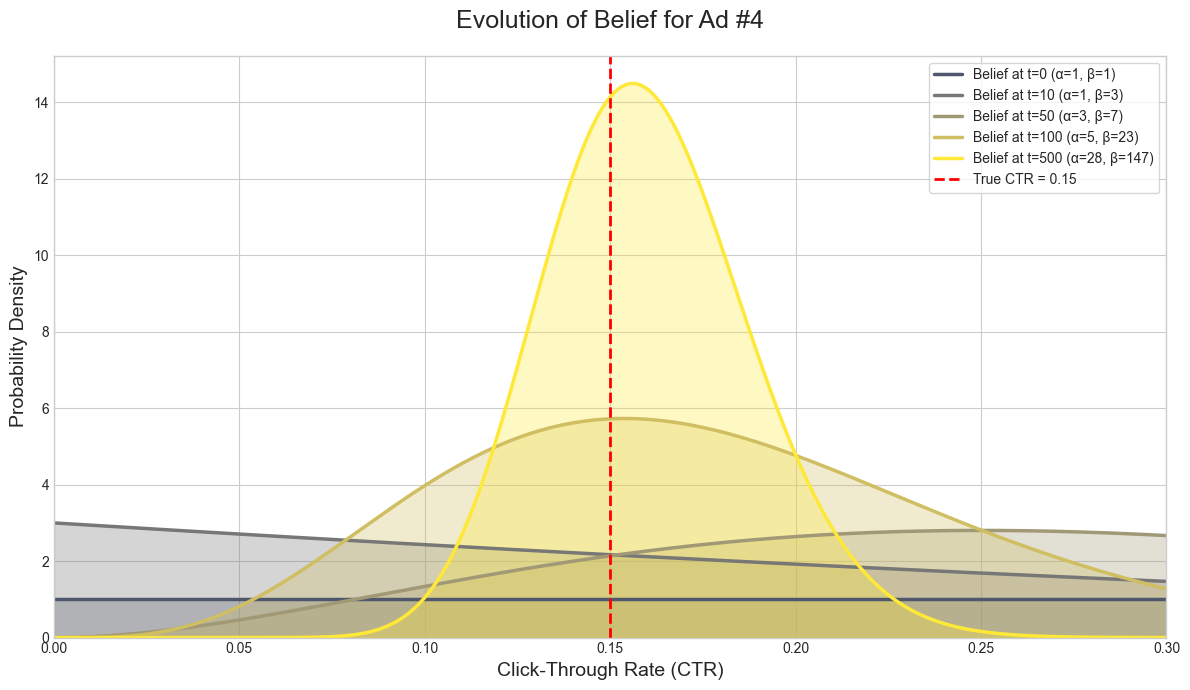

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import copy

# =============================================================================
# Step 1: Define the Environment and Agent Classes
# We need these classes to run the simulation.
# =============================================================================

class AdCampaignEnvironment:
    """
    A simplified simulation of an ad campaign environment.
    """
    def __init__(self, ad_probabilities):
        self.ad_probabilities = ad_probabilities

    def pull_arm(self, ad_index):
        """
        Simulates showing an ad and returns a reward (1 for click, 0 for no click).
        """
        ctr = self.ad_probabilities[ad_index]
        return 1 if np.random.rand() < ctr else 0

class ThompsonSamplingAgent:
    """
    Implements the Thompson Sampling algorithm.
    """
    def __init__(self, num_ads):
        self.num_ads = num_ads
        self.alphas = [1] * num_ads
        self.betas = [1] * num_ads

    def choose_action(self):
        """
        Samples from each ad's Beta distribution and chooses the best one.
        """
        sampled_ctrs = [np.random.beta(a, b) for a, b in zip(self.alphas, self.betas)]
        return np.argmax(sampled_ctrs)

    def update(self, chosen_ad_index, reward):
        """
        Updates the alpha or beta parameter for the chosen ad.
        """
        if reward == 1:
            self.alphas[chosen_ad_index] += 1
        else:
            self.betas[chosen_ad_index] += 1

# =============================================================================
# Step 2: Run the Simulation and Store Beliefs for One Specific Ad
# =============================================================================

# --- Simulation Parameters ---
true_ctrs = [0.05, 0.12, 0.08, 0.15, 0.11]
# We'll focus on the best ad, which is at index 3
AD_TO_VISUALIZE = 3
true_ctr_for_ad = true_ctrs[AD_TO_VISUALIZE]

max_impressions = 501
# Define the specific time steps where we want to capture the agent's beliefs
visualization_intervals = [0, 10, 50, 100, 500]

# --- Initialization ---
env = AdCampaignEnvironment(ad_probabilities=true_ctrs)
agent = ThompsonSamplingAgent(num_ads=len(true_ctrs))
# Store the beliefs (alpha, beta) for our target ad at each interval
stored_beliefs_for_one_ad = {}

# --- Simulation Loop ---
for i in range(max_impressions):
    # If the current step is a visualization point, store the agent's state for our ad
    if i in visualization_intervals:
        stored_beliefs_for_one_ad[i] = (agent.alphas[AD_TO_VISUALIZE], agent.betas[AD_TO_VISUALIZE])
        
    # Agent chooses an ad, environment gives a reward, agent updates
    chosen_ad = agent.choose_action()
    reward = env.pull_arm(chosen_ad)
    agent.update(chosen_ad, reward)

# =============================================================================
# Step 3: Create the Focused, Layered Visualization
# =============================================================================

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Define a color map that fades from light to dark
colors = plt.cm.cividis(np.linspace(0.3, 1, len(visualization_intervals)))

# Create a grid of x-values from 0 to 1 for plotting the PDFs.
x = np.linspace(0, 0.3, 400) # Zoom in on the relevant CTR range

# Iterate through the stored time steps to overlay the distributions
for i, t_step in enumerate(visualization_intervals):
    a, b = stored_beliefs_for_one_ad[t_step]
    
    # Calculate the Probability Density Function (PDF) for this belief state
    pdf = beta.pdf(x, a, b)
    
    # Plot the distribution line with increasing darkness
    ax.plot(x, pdf, color=colors[i], lw=2.5, label=f'Belief at t={t_step} (α={a}, β={b})')
    # Fill the area under the curve with a faded color
    ax.fill_between(x, pdf, color=colors[i], alpha=0.3)

# Plot the true CTR for reference as a prominent dashed line
ax.axvline(x=true_ctr_for_ad, color='red', linestyle='--', lw=2, label=f'True CTR = {true_ctr_for_ad}')

# --- Formatting for a clean, professional look ---
ax.set_title(f'Evolution of Belief for Ad #{AD_TO_VISUALIZE + 1}', fontsize=18, pad=20)
ax.set_xlabel('Click-Through Rate (CTR)', fontsize=14)
ax.set_ylabel('Probability Density', fontsize=14)
ax.legend(fontsize='medium', frameon=True, facecolor='white', framealpha=0.8)
ax.set_ylim(bottom=0)
ax.set_xlim(0, 0.3) # Set x-axis limits to focus on the action

plt.tight_layout()
plt.show()
